# Advanced Exploratory Data Analysis (EDA) on Iris Dataset

In [7]:
# Importing core libraries for Analysis and Visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Configuration for professional aesthetics
sns.set_theme(style="whitegrid", palette="husl")
# Suppress warnings for a cleaner notebook output
warnings.filterwarnings("ignore")

print("Libraries imported and configuration set successfully. ")

Libraries imported and configuration set successfully. 


In [3]:
# Load Dataset
df = sns.load_dataset('iris')

# --- Professional Data Check ---
print(f"Dataset Shape: {df.shape}")
print("-" * 30)

# 1. Checking for Missing Values
missing_values = df.isnull().sum().sum()
print(f"Total Missing Values: {missing_values}")

# 2. Checking for Duplicates
duplicates = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicates}")

# Handling Duplicates (If any exist, we remove them for accuracy)
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"-> Duplicates removed. New Shape: {df.shape}")
else:
    print("-> Data is clean.")

Dataset Shape: (150, 5)
------------------------------
Total Missing Values: 0
Total Duplicate Rows: 1
-> Duplicates removed. New Shape: (149, 5)


<Figure size 1200x1000 with 0 Axes>

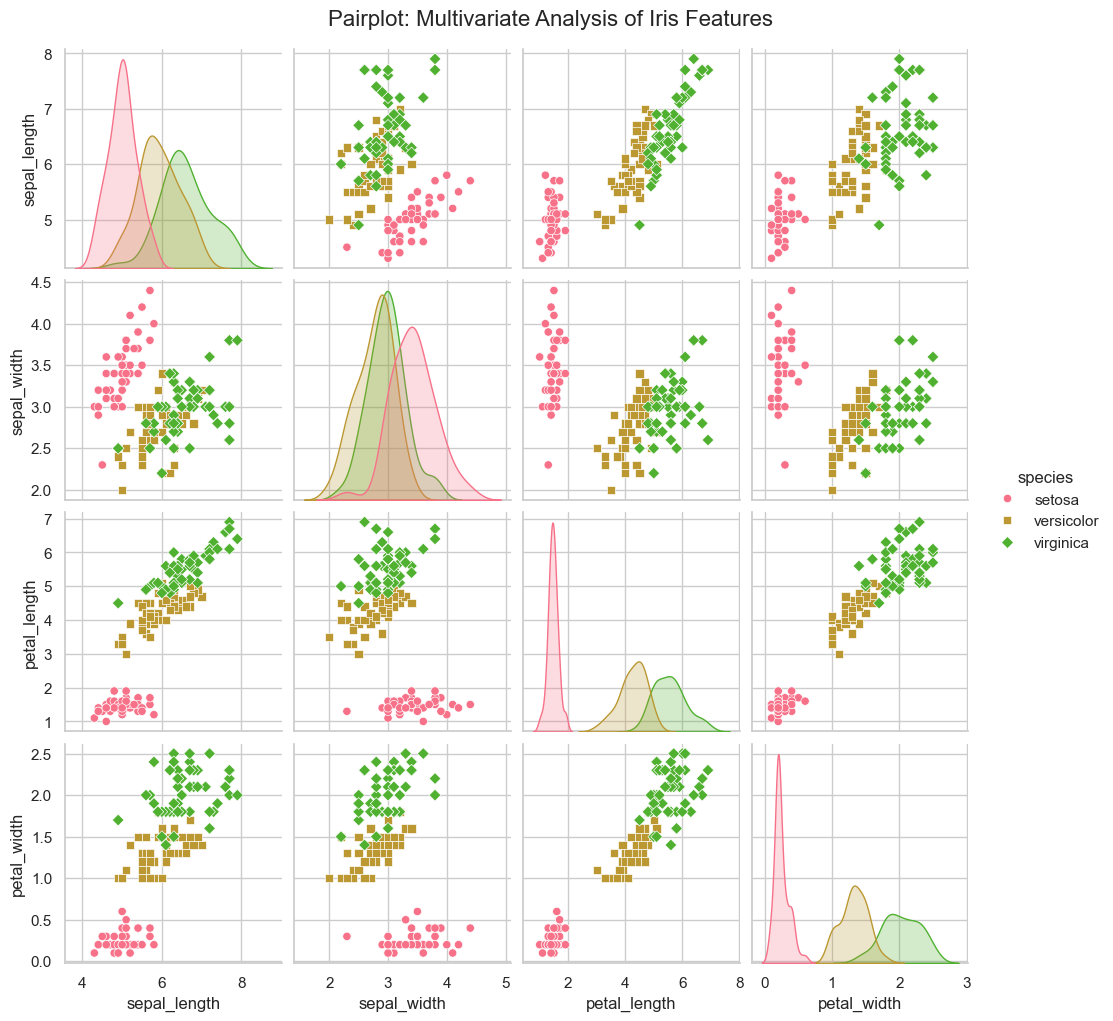

In [4]:
# Generating a Pairplot to visualize all relationships at once
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='species', markers=["o", "s", "D"], height=2.5)
plt.suptitle("Pairplot: Multivariate Analysis of Iris Features", y=1.02, fontsize=16)
plt.show()

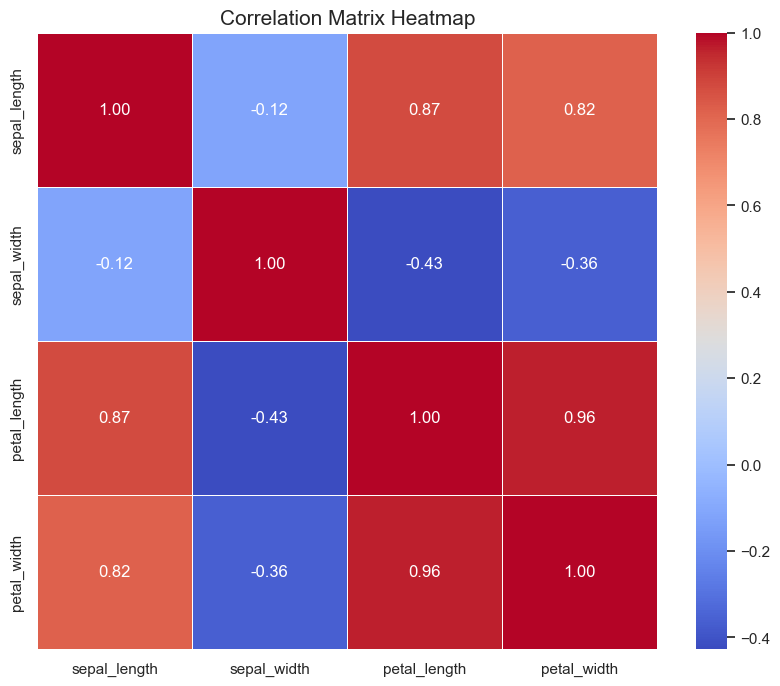

In [5]:
# Calculating Correlation Matrix (Only for numeric columns)
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

# Plotting the Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap", fontsize=15)
plt.show()

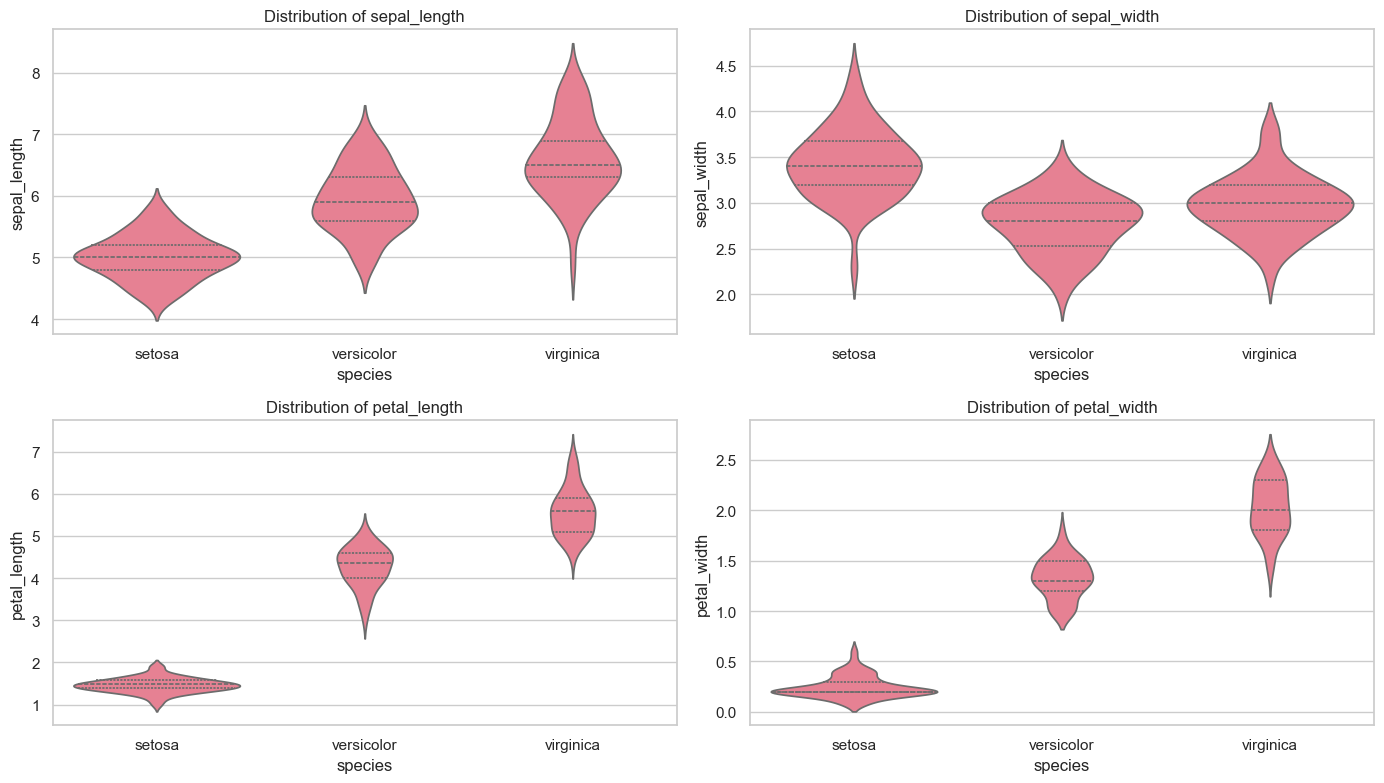

In [6]:
# Creating Violin Plots for each feature
plt.figure(figsize=(14, 8))

# Subplot loop to create 4 violin plots efficiently
for i, col in enumerate(numeric_df.columns):
    plt.subplot(2, 2, i+1)
    sns.violinplot(data=df, x='species', y=col, inner="quartile")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()